In [11]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = []
y = [[],[],[],[],[]]
y2 = [[],[],[],[],[]]
y3 = [[],[],[],[],[]]
y4 = [[],[],[],[],[]]

#資料處理，y=韓票數，y2=陳，y3=兩人票差，y4=兩人票差比率
#Time-Han	PTS	TTV	SET	CTV	EBC	Time-Chen	PTS	TTV	SET	CTV	EBC
with open('election.csv', 'r') as csvfile:
    plots = csv.reader(csvfile)
    for row in plots:
        if(row != ['','','','','']):
            x.append(row[0])
            for j in range(0,5):
                y[j].append(row[j+1])
    with open('election2.csv', 'r') as csvfile:
        plots2 = csv.reader(csvfile)
        for row in plots2:
            if(row != ['','','','','']):
                for j in range(0,5):
                    y2[j].append(row[j+1])

for i in range(0,73):
    for j in range(0,5):
        y3[j].append(int(y[j][i]) - int(y2[j][i]))
        y4[j].append(y3[j][i]/(int(y[j][i]) + int(y2[j][i])+1))


這個研究的目的是在看選舉時收視率前端的媒體在報導票數的情形，並以高雄市為例
實驗組是當下收視率相對較高五家電視台，對照組則選擇相對中立的公視
雖然公視的票數是取自國民黨，但國民黨是全台最大能派出回報票數監票員的組織（媒體説他們也會這麼做，但不太可能，後續會說明）
，加上前數次選舉證明國民黨至少這方面不會亂搞，因此公視算是可信

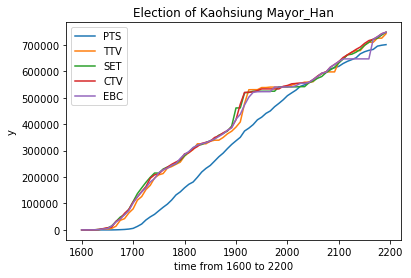

In [3]:
plt.plot(x[0:72],y[0][0:72], label='PTS')
plt.plot(x[0:72],y[1][0:72], label='TTV')
plt.plot(x[0:72],y[2][0:72], label='SET')
plt.plot(x[0:72],y[3][0:72], label='CTV')
plt.plot(x[0:72],y[4][0:72], label='EBC')
plt.xlabel('time from 1600 to 2200')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Han')
plt.xticks([1,13,25,37,49,61,73],['1600','1700','1800','1900','2000','2100','2200'])

plt.legend()
plt.show()


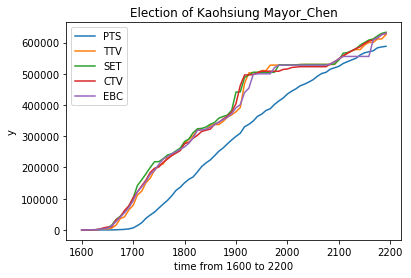

In [4]:
plt.plot(x[0:72],y2[0][0:72], label='PTS')
plt.plot(x[0:72],y2[1][0:72], label='TTV')
plt.plot(x[0:72],y2[2][0:72], label='SET')
plt.plot(x[0:72],y2[3][0:72], label='CTV')
plt.plot(x[0:72],y2[4][0:72], label='EBC')
plt.xlabel('time from 1600 to 2200')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Chen')
plt.xticks([1,13,25,37,49,61,73],['1600','1700','1800','1900','2000','2100','2200'])
plt.legend()
plt.show()

藍色的是公視的票數進程，可以看到其他媒體都會浮報票數，並且會互相“借鑑”，最後發現苗頭不對會突然停止開票向公視靠攏，也可以順便證明媒體們不可能是個別派出監票員回報，因為他們的票數在多個時間點實在太一致，就連不合理的曲線都一致

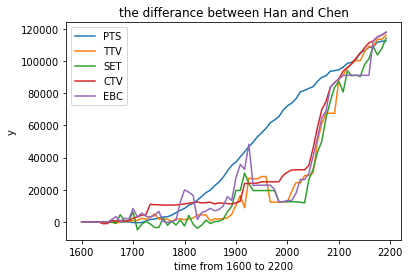

In [13]:
plt.plot(x[0:72],y3[0][0:72], label='PTS')
plt.plot(x[0:72],y3[1][0:72], label='TTV')
plt.plot(x[0:72],y3[2][0:72], label='SET')
plt.plot(x[0:72],y3[3][0:72], label='CTV')
plt.plot(x[0:72],y3[4][0:72], label='EBC')
plt.xlabel('time from 1600 to 2200')
plt.ylabel('y')
plt.title('the differance between Han and Chen')
plt.xticks([1,13,25,37,49,61,73],['1600','1700','1800','1900','2000','2100','2200'])
plt.legend()
plt.show()

這是韓減掉陳的票數進程，可以看到媒體一開始都認為兩人會很拉鋸（兩人票數差很接近），直到最後突然一個衝刺緊急修正到公視的曲線

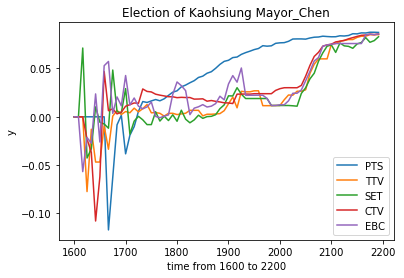

In [12]:
plt.plot(x[0:72],y4[0][0:72], label='PTS')
plt.plot(x[0:72],y4[1][0:72], label='TTV')
plt.plot(x[0:72],y4[2][0:72], label='SET')
plt.plot(x[0:72],y4[3][0:72], label='CTV')
plt.plot(x[0:72],y4[4][0:72], label='EBC')
plt.xlabel('time from 1600 to 2200')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Chen')
plt.xticks([1,13,25,37,49,61,73],['1600','1700','1800','1900','2000','2100','2200'])
plt.legend()
plt.show()

這張與上方的圖相仿，但將票差除掉當下的總票數，也就是盡力只看兩人的差距比例
前一小時因為票數不多加上資料斷點更新時常只更新一人，所以稍嫌不準確
大概在5點多後可以比較明顯看出電視台對兩名候選人的預期不同，像三立到快七點還認為陳會贏（比率小於0），也是最晚修正至公視曲線的人

總而言之，媒體們會被自己對特定政黨或候選人的偏好影響呈現票數（而且很大），且不論偏好，光是票數就是在浮報
想在看正確的票數直播，還是看公視或中選會吧